Model Accuracy: 0.9930

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     38518
        True       0.99      0.99      0.99     19955

    accuracy                           0.99     58473
   macro avg       0.99      0.99      0.99     58473
weighted avg       0.99      0.99      0.99     58473



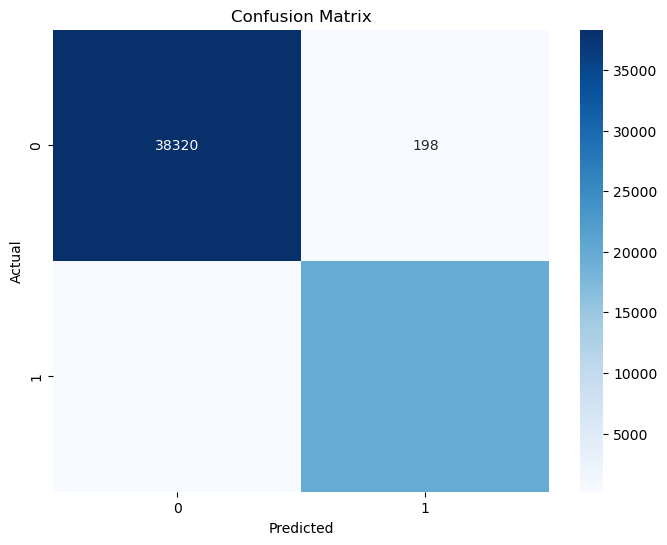

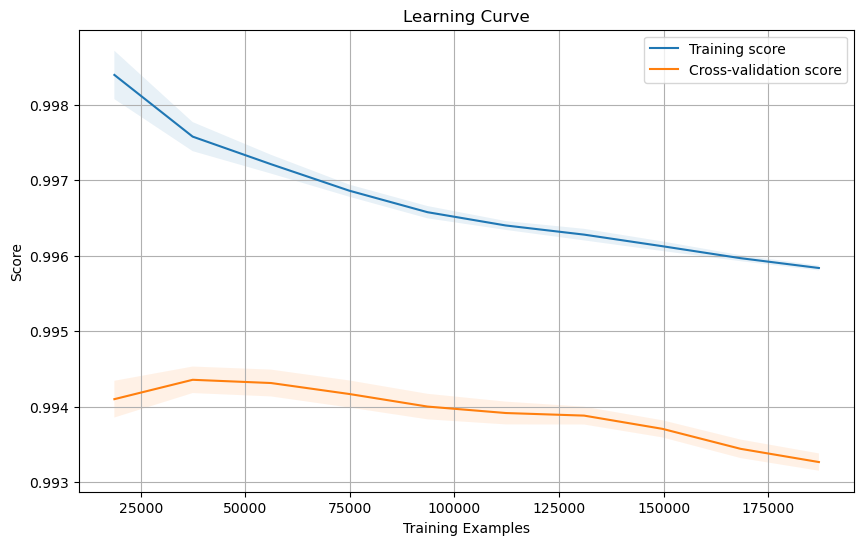

Prediction of Growing Stress: Yes


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
def load_data(filepath):
    data = pd.read_csv(filepath)
    data.drop(columns=['Timestamp'], inplace=True)
    data['self_employed'] = data['self_employed'].fillna(data['self_employed'].mode()[0])
    return data

# Preprocess the data
def preprocess_data(data):
    return pd.get_dummies(data, drop_first=True)

# Split data into training and testing sets
def split_data(data_encoded):
    X = data_encoded.drop('Growing_Stress_Yes', axis=1)
    y = data_encoded['Growing_Stress_Yes']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
def train_model(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

# Evaluate the model
def evaluate_model(rf_model, X_test, y_test):
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return accuracy, y_pred

# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot learning curve
def plot_learning_curve(X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        RandomForestClassifier(n_estimators=100, random_state=42), X, y, 
        cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Predict function for customer input
def predict_growing_stress(rf_model, X_columns, input_data):
    template_df = pd.DataFrame(columns=X_columns)
    template_df.loc[0] = 0
    input_df = pd.get_dummies(pd.DataFrame([input_data]))
    for column in input_df.columns:
        if column in template_df.columns:
            template_df.at[0, column] = input_df.at[0, column].astype(template_df[column].dtype)
    prediction = rf_model.predict(template_df)
    return "Yes" if prediction[0] == 1 else "No"

# Main function to run the program
def main():
    data = load_data('Dataset.csv')
    data_encoded = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(data_encoded)
    
    rf_model = train_model(X_train, y_train)
    accuracy, y_pred = evaluate_model(rf_model, X_test, y_test)
    
    plot_confusion_matrix(y_test, y_pred)
    plot_learning_curve(X_train, y_train)
    
    # Example input from a customer
    input_data = {
        'Gender': 'Female',
        'Country': 'United States',
        'Occupation': 'Corporate',
        'self_employed': 'No',
        'family_history': 'No',
        'treatment': 'Yes',
        'Days_Indoors': '1-14 days',
        'Changes_Habits': 'No',
        'Mental_Health_History': 'Yes',
        'Mood_Swings': 'Medium',
        'Coping_Struggles': 'No',
        'Work_Interest': 'No',
        'Social_Weakness': 'Yes',
        'mental_health_interview': 'No',
        'care_options': 'Not sure'
    }

    result = predict_growing_stress(rf_model, X_train.columns, input_data)
    print("Prediction of Growing Stress:", result)

if __name__ == '__main__':
    main()

Validation Results:
Accuracy: 0.9927
              precision    recall  f1-score       support
False          0.993731  0.995317  0.994523  19431.000000
True           0.990691  0.987559  0.989122   9806.000000
accuracy       0.992715  0.992715  0.992715      0.992715
macro avg      0.992211  0.991438  0.991823  29237.000000
weighted avg   0.992711  0.992715  0.992712  29237.000000


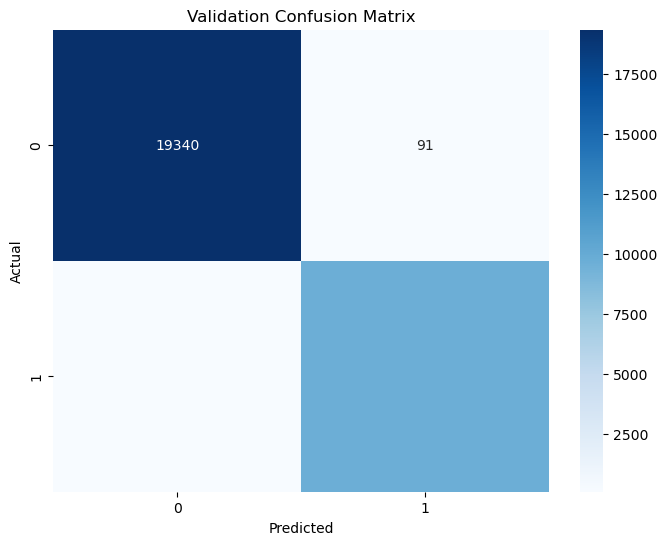


Test Results:
Accuracy: 0.9934
              precision    recall  f1-score       support
False          0.994553  0.995483  0.995018  38518.000000
True           0.991265  0.989476  0.990370  19955.000000
accuracy       0.993433  0.993433  0.993433      0.993433
macro avg      0.992909  0.992479  0.992694  58473.000000
weighted avg   0.993431  0.993433  0.993431  58473.000000


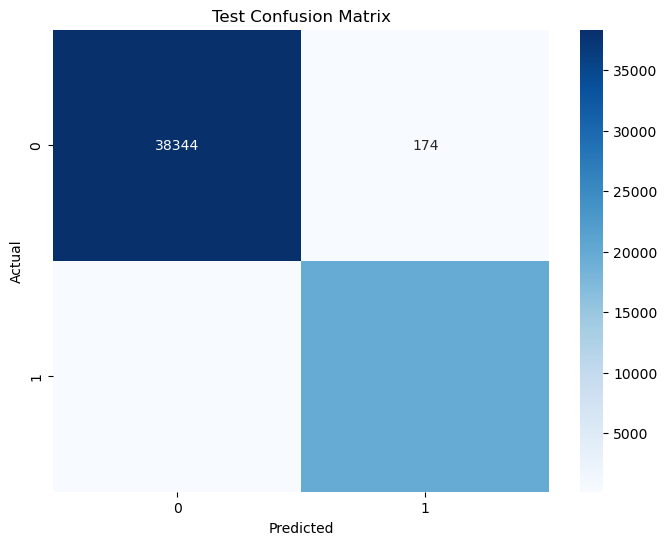

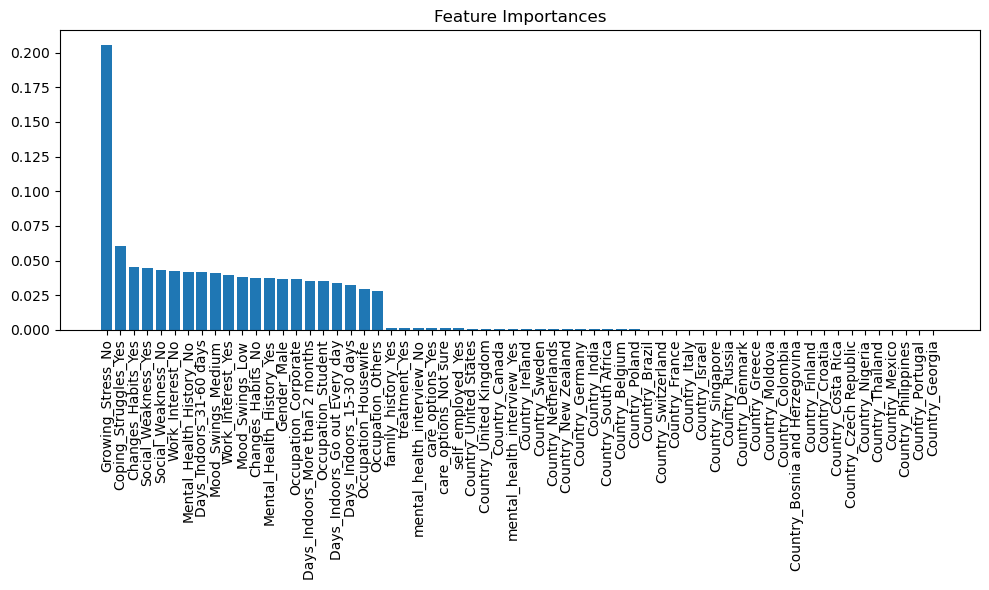

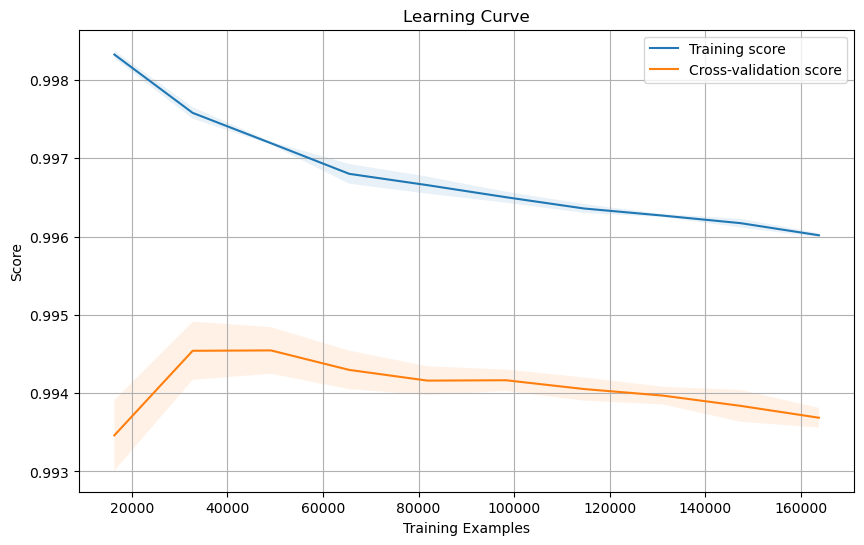


Prediction for example input: Yes


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filepath):
    data = pd.read_csv(filepath)
    data.drop(columns=['Timestamp'], inplace=True)
    data['self_employed'] = data['self_employed'].fillna(data['self_employed'].mode()[0])
    return data

def preprocess_data(data):
    return pd.get_dummies(data, drop_first=True)

def split_data(data_encoded):
    X = data_encoded.drop('Growing_Stress_Yes', axis=1)
    y = data_encoded['Growing_Stress_Yes']
    
    # First split: 80% train+validation, 20% test
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Second split: 70% train, 10% validation (87.5% of 80% is 70% of total)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def train_model(X_train, y_train):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)
    return accuracy, report

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_feature_importance(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.tight_layout()
    plt.show()

def predict_growing_stress(model, X_columns, input_data):
    template_df = pd.DataFrame(columns=X_columns)
    template_df.loc[0] = 0
    input_df = pd.get_dummies(pd.DataFrame([input_data]))
    for column in input_df.columns:
        if column in template_df.columns:
            template_df.at[0, column] = input_df.at[0, column].astype(template_df[column].dtype)
    prediction = model.predict(template_df)
    return "Yes" if prediction[0] == 1 else "No"

def main():
    # Load and preprocess the data
    data = load_data('Dataset.csv')
    data_encoded = preprocess_data(data)
    
    # Split the data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_encoded)
    
    # Train the model
    rf_model = train_model(X_train, y_train)
    
    # Evaluate on validation set
    val_accuracy, val_report = evaluate_model(rf_model, X_val, y_val)
    print("Validation Results:")
    print(f"Accuracy: {val_accuracy:.4f}")
    print(pd.DataFrame(val_report).transpose())
    
    # Plot confusion matrix for validation set
    plot_confusion_matrix(y_val, rf_model.predict(X_val), "Validation Confusion Matrix")
    
    # Evaluate on test set
    test_accuracy, test_report = evaluate_model(rf_model, X_test, y_test)
    print("\nTest Results:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(pd.DataFrame(test_report).transpose())
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(y_test, rf_model.predict(X_test), "Test Confusion Matrix")
    
    # Plot feature importance
    plot_feature_importance(rf_model, X_train)

    # Plot learning curve
    plot_learning_curve(X_train, y_train)

    
    # Example prediction
    input_data = {
        'Gender': 'Female',
        'Country': 'United States',
        'Occupation': 'Corporate',
        'self_employed': 'No',
        'family_history': 'No',
        'treatment': 'Yes',
        'Days_Indoors': '1-14 days',
        'Changes_Habits': 'No',
        'Mental_Health_History': 'Yes',
        'Mood_Swings': 'Medium',
        'Coping_Struggles': 'No',
        'Work_Interest': 'No',
        'Social_Weakness': 'Yes',
        'mental_health_interview': 'No',
        'care_options': 'Not sure'
    }
    prediction = predict_growing_stress(rf_model, X_train.columns, input_data)
    print(f"\nPrediction for example input: {prediction}")

if __name__ == '__main__':
    main()